In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
%matplotlib inline

In [2]:
# Load persistent data I/O stats of queries
df = pd.read_parquet('../dataset_masked_v3.parquet', columns = ['persistentReadBytesCache', 
                                                                'persistentReadBytesS3', 
                                                                'persistentWriteBytesS3'],
                    engine='fastparquet')

In [3]:
# Calculate total amount of persistent data bytes read and written
df['persistentReadBytes'] = df['persistentReadBytesCache'] + df['persistentReadBytesS3']
# Cache is write-through
df['persistentWriteBytes'] = df['persistentWriteBytesS3'] 

Text(0.5, 1.0, 'Persistent Data I/O scatter-plot')

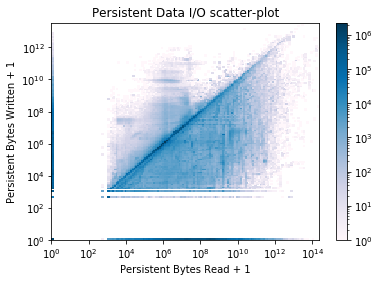

In [4]:
# Scatter-plot for persistent read/write bytes
def logScatterPlot(x, y):
    x_bins = np.logspace(np.log10(min(x)), np.log10(max(x)), 150)
    y_bins = np.logspace(np.log10(min(y)), np.log10(max(y)), 150)
    
    Z, xedges, yedges = np.histogram2d(x,y,[x_bins,y_bins])
    p = plt.pcolormesh(xedges, yedges, Z.T, norm=colors.LogNorm(vmin=1, vmax=Z.max()),
                        cmap='PuBu')
    plt.gcf().colorbar(p)

    plt.yscale('log')
    plt.xscale('log')
    
    return plt.gca()

ax = logScatterPlot(df['persistentReadBytes'] + 1, df['persistentWriteBytes'] + 1)
ax.set_xlabel('Persistent Bytes Read + 1')
ax.set_ylabel('Persistent Bytes Written + 1')
ax.set_title('Persistent Data I/O scatter-plot')

In [5]:
# Assign query classes
df['ronly'] = (df['persistentWriteBytes'] == 0).astype('int')
df['wonly'] = (df['persistentReadBytes'] == 0).astype('int')
df['rw'] = ((df['persistentReadBytes'] > 0) & (df['persistentWriteBytes'] > 0)).astype('int')

In [6]:
# Compute per-class query counts
df[['ronly', 'wonly', 'rw']].sum()

ronly    20253279
wonly    10394740
rw       39814996
dtype: int64